##**Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

#**EDA (Understand data)**

##**Read_Data**

In [2]:
data = pd.read_csv("/content/Microsoft_stock_data.csv")

##**Read the first five row**

In [3]:
data.head(3)

,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059598,0.062259,0.054277,0.054277,1031788800
1,1986-03-14,0.061726,0.062791,0.059598,0.059598,308160000
2,1986-03-17,0.062791,0.063323,0.061726,0.061726,133171200


##**Read the Last five row**

In [4]:
data.tail(3)

,Date,Close,High,Low,Open,Volume
9908,2025-07-11,503.320007,505.029999,497.799988,498.470001,16459500
9909,2025-07-14,503.019989,503.970001,501.029999,501.519989,12058800
9910,2025-07-15,505.820007,508.299988,502.790009,503.019989,14906100


##**Data types**

In [5]:
data.dtypes

,0
Date,object
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


##**data size**

In [6]:
Data = data.shape
print(" Rows * Cols \n" ,  Data)

 Rows * Cols 
 (9911, 6)


##**Summarize Statstical information about data**

In [7]:
data.describe()

,Close,High,Low,Open,Volume
count,9911.000000,9911.000000,9911.000000,9911.000000,9.911000e+03
mean,61.367344,61.954381,60.723374,61.343928,5.593001e+07
std,105.327803,106.244056,104.288076,105.275370,3.808432e+07
min,0.055341,0.056405,0.054277,0.054277,2.304000e+06
25%,3.697189,3.745080,3.649299,3.697188,3.089035e+07
50%,19.368290,19.557930,19.107380,19.342338,4.912000e+07
75%,41.251879,41.513203,40.922019,41.217678,6.993120e+07
max,505.820007,508.299988,502.790009,503.049988,1.031789e+09


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.drop_duplicates(inplace=True)

##**summarize Information about data**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9911 non-null   object 
 1   Close   9911 non-null   float64
 2   High    9911 non-null   float64
 3   Low     9911 non-null   float64
 4   Open    9911 non-null   float64
 5   Volume  9911 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.7+ KB


##**Check missing values**

In [11]:
data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [12]:
missing_values = data.isnull().sum()
ratio_of_missing_values = missing_values / data.shape[0]
pd.DataFrame({"missing_values": missing_values , "Ratio": ratio_of_missing_values}) .T

,Date,Close,High,Low,Open,Volume
missing_values,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0


##**Unique values in each feature**

In [13]:
data_types=data.dtypes
unique_Feature = data.nunique()
pd.DataFrame({"Dtypes": data_types ,"unique_values":unique_Feature }).T

,Date,Close,High,Low,Open,Volume
Dtypes,object,float64,float64,float64,float64,int64
unique_values,9911,7805,9613,9606,9727,9718


##**Understand the distribution of the Target feature**

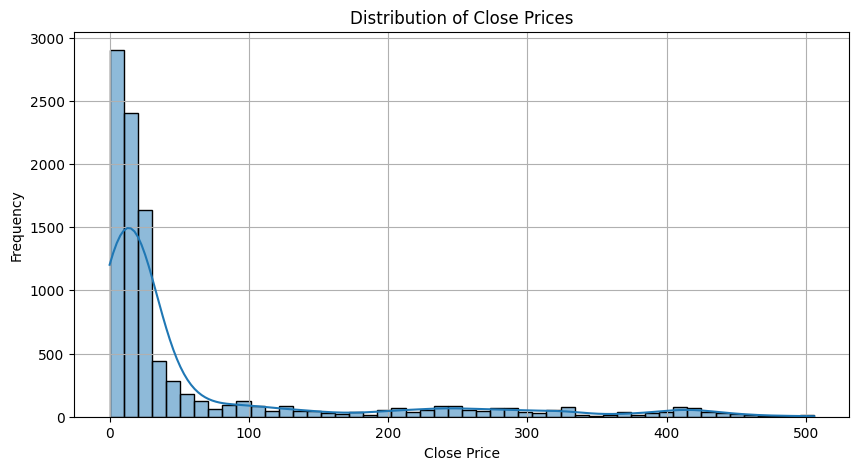

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




##**Showing the relationship between each feature and Target column (Scatter blot)**

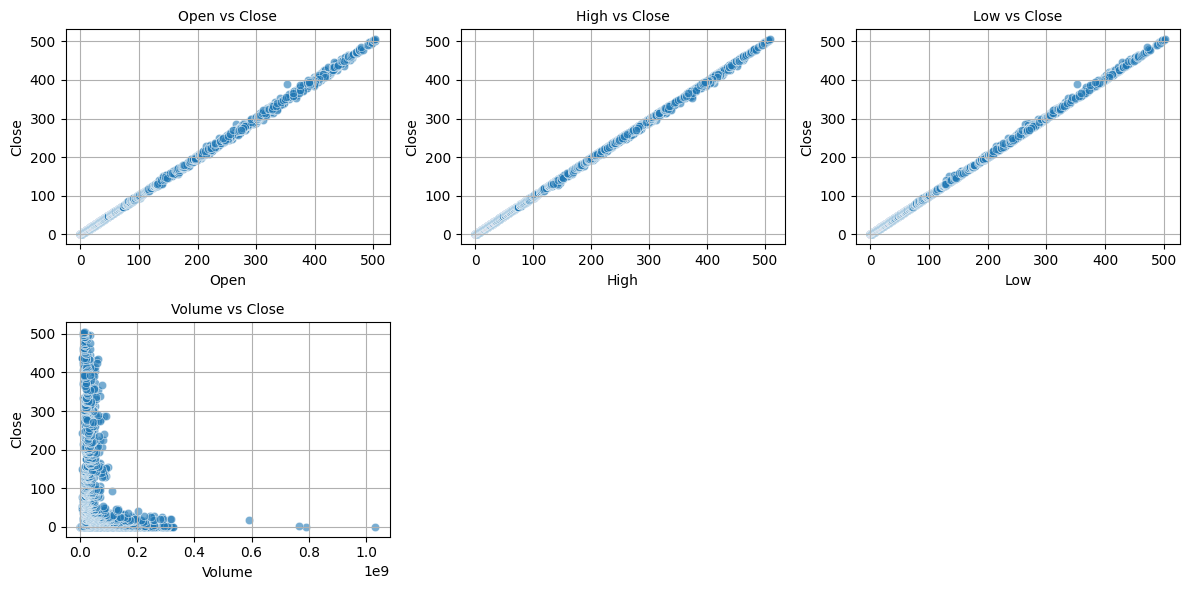

In [15]:
import math
main_features = ['Open', 'High', 'Low', 'Volume']  # الأعمدة الأساسية
numeric_cols = [col for col in main_features if data[col].dtype != 'O']  # الأعمدة الرقمية فقط

n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 4, rows * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=data[col], y=data['Close'], alpha=0.6)
    plt.title(f"{col} vs Close", fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Close")
    plt.grid(True)

plt.tight_layout()
plt.show()


##**Detect in  outliers**

In [16]:
# using the Ratio :
original_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

outlier_percent = {
    col: round((((data[col] < data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))) |
                 (data[col] > data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)))).sum()
                 / len(data)) * 100, 2)
    for col in original_cols if pd.api.types.is_numeric_dtype(data[col])
}

pd.DataFrame.from_dict(outlier_percent, orient='index', columns=['Outliers ratio']).T


,Open,High,Low,Close,Volume
Outliers ratio,17.49,17.54,17.47,17.5,3.72


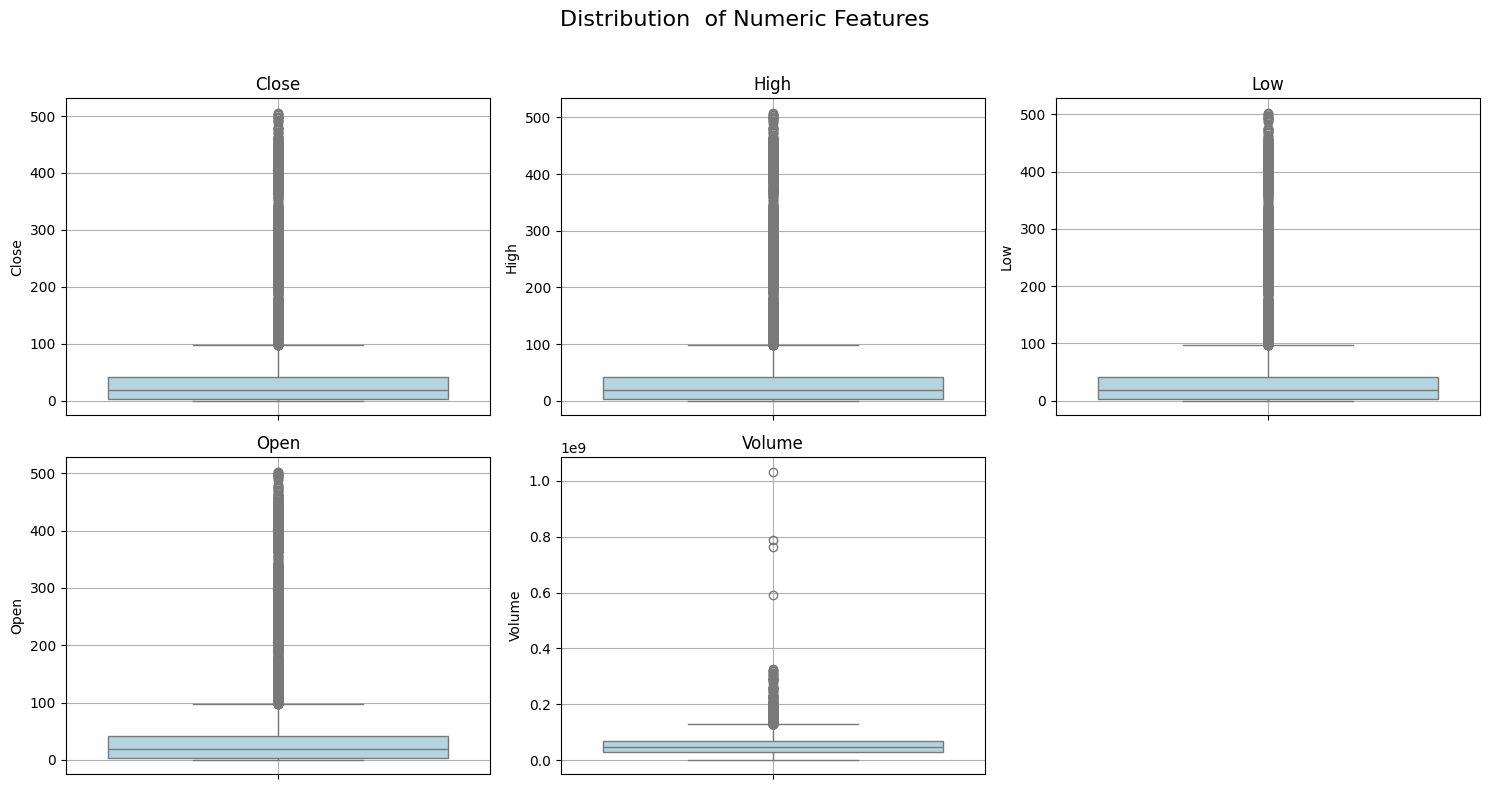

In [17]:
import math
numeric_cols = data.select_dtypes(include='number').columns
n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col], color='lightblue', linewidth=1)
    plt.title(f"{col}", fontsize=12)
    plt.grid(True)

plt.suptitle("Distribution  of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##**Showing the relationship between each feature and Target column (Heatmap)**

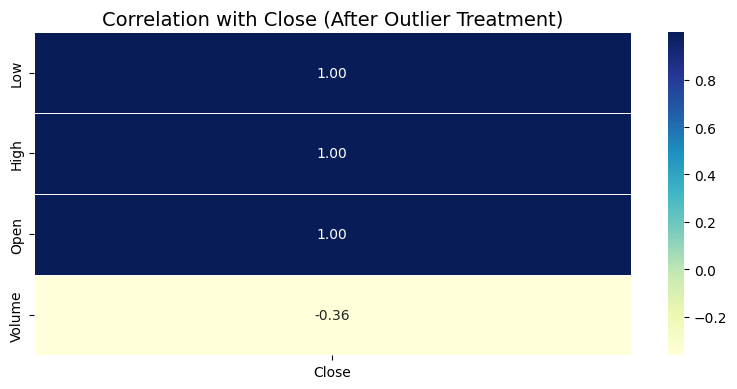

In [18]:
corr = data.corr(numeric_only=True)
corr_with_close = corr['Close'].drop('Close').sort_values(ascending=False).to_frame()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_with_close, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation with Close (After Outlier Treatment)", fontsize=14)
plt.tight_layout()
plt.show()

#**Data Preprocessing**

##**Treat outliers**

In [19]:
def treat_outliers_iqr(df):
    df_treated = df.copy()
    numeric_cols = df_treated.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping
        df_treated[col] = df_treated[col].clip(lower=lower_bound, upper=upper_bound)

    return df_treated


data_capped = treat_outliers_iqr(data)


##**Boxplot of Numerical Columns**

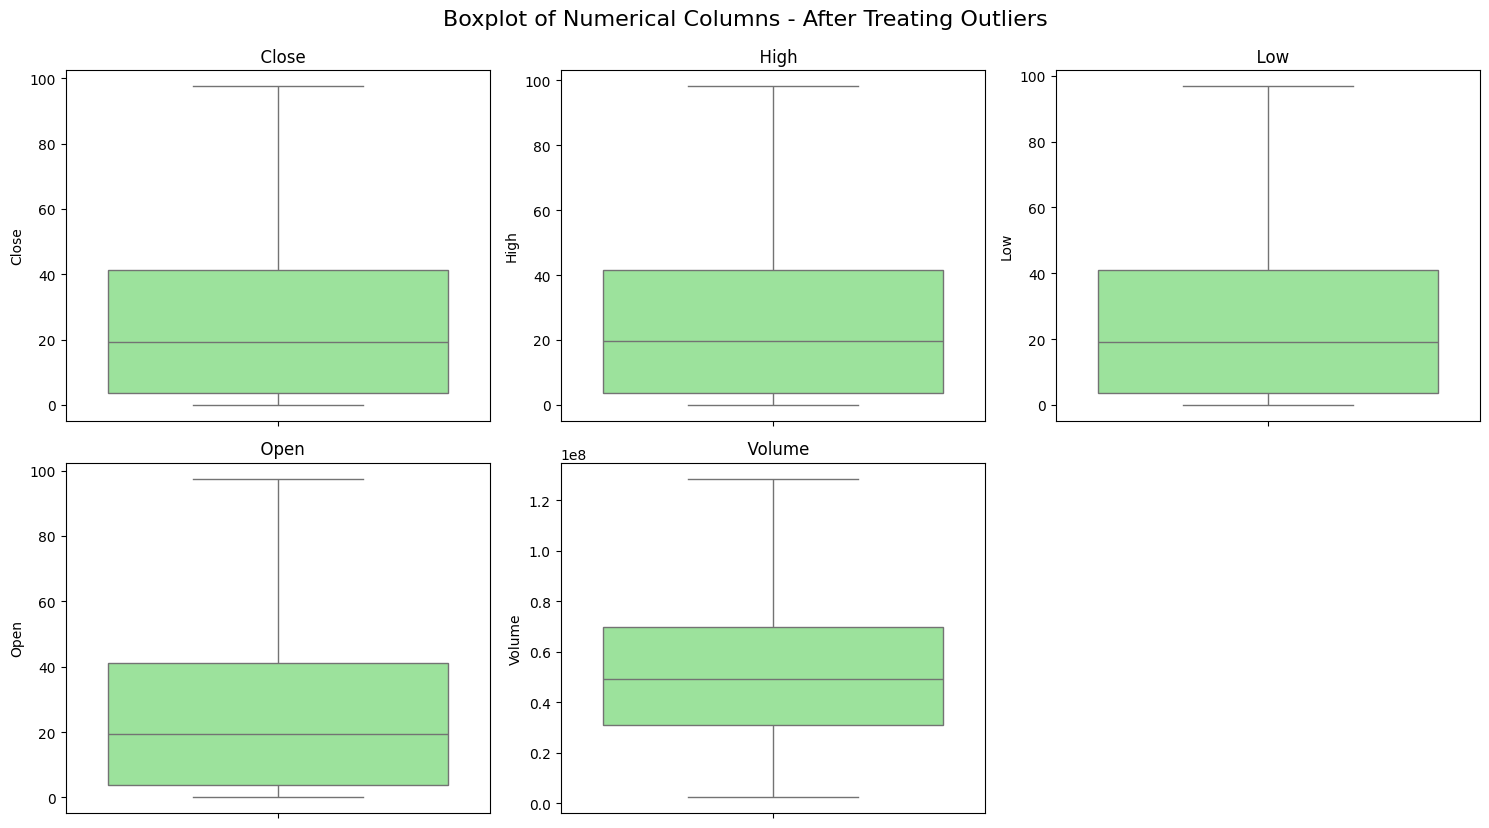

In [20]:

for col in numeric_cols:
    Q1 = data_capped[col].quantile(0.25)
    Q3 = data_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped[col] = data_capped[col].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(cols * 5, rows * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data_capped[col], color='lightgreen')
    plt.title(f"  {col}")
plt.tight_layout()
plt.suptitle("Boxplot of Numerical Columns - After Treating Outliers", fontsize=16, y=1.03)
plt.show()


##**Feature Extraction from 'Date' instead of Encoding**

In [21]:
data = pd.read_csv("Microsoft_stock_data.csv")

#Convert the Date feature into datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Select the main featute from Date feature
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Date_Ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Drop date feature
data.drop(columns=['Date'], inplace=True)
data.head(2)


,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek,DayOfYear,Date_Ordinal
0,0.059598,0.062259,0.054277,0.054277,1031788800,1986,3,13,3,72,725078
1,0.061726,0.062791,0.059598,0.059598,308160000,1986,3,14,4,73,725079


##**Standardize data Using the Min Max Scaler**

In [24]:
target = data['Close']
features = data.drop(columns=['Close'])
#Scaling
from sklearn.preprocessing import MinMaxScaler
# تطبيق MinMaxScale
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [28]:
# Convert the scaled features array back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Add the target feature back to the DataFrame
features_scaled_df['Close'] = target.values

# Save the preprocessed data
features_scaled_df.to_csv("final_preprocessed_data.csv", index=False)

# Check the data
features_scaled_df.head(2)

,High,Low,Open,Volume,Year,Month,Day,DayOfWeek,DayOfYear,Date_Ordinal,Close
0,0.000012,0.000000,0.000000,1.000000,0.0,0.181818,0.400000,0.75,0.192308,0.00000,0.059598
1,0.000013,0.000011,0.000011,0.297096,0.0,0.181818,0.433333,1.00,0.195055,0.00007,0.061726


In [29]:
features_scaled_df.dtypes

,0
High,float64
Low,float64
Open,float64
Volume,float64
Year,float64
Month,float64
Day,float64
DayOfWeek,float64
DayOfYear,float64
Date_Ordinal,float64


#**Data Visualization**

##**Read Cleaned Data**

In [30]:
New_Data = pd.read_csv("/content/final_preprocessed_data.csv")

##  Correlation Heatmap

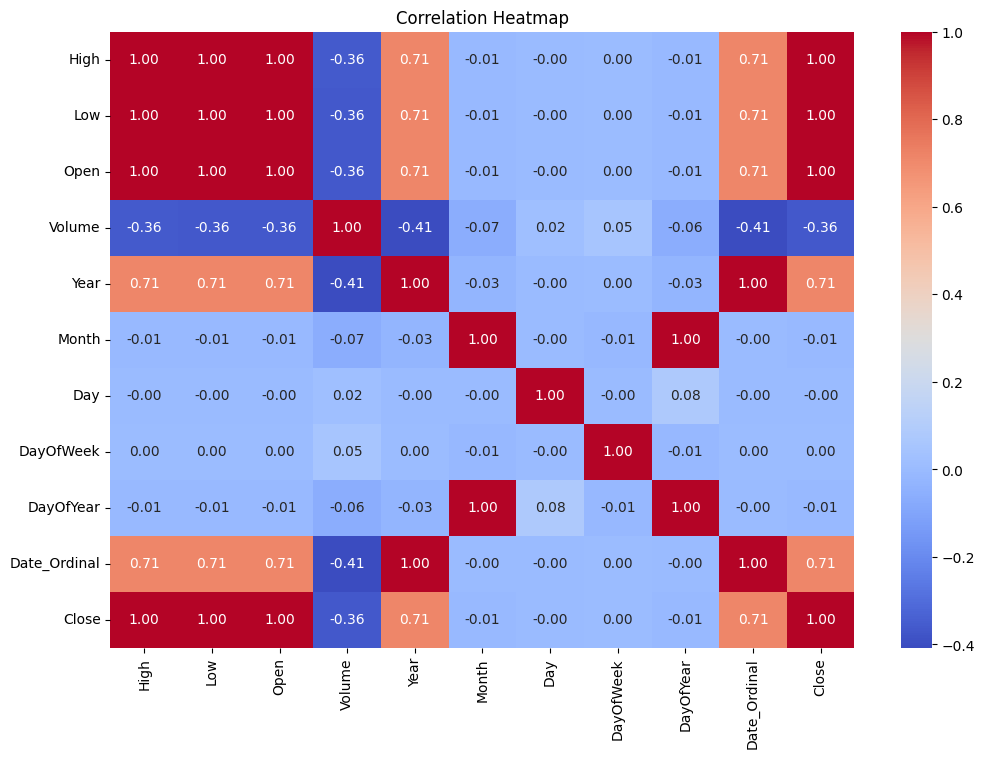

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(features_scaled_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##  Distribution Plot for each numerical column **(Histogram)**

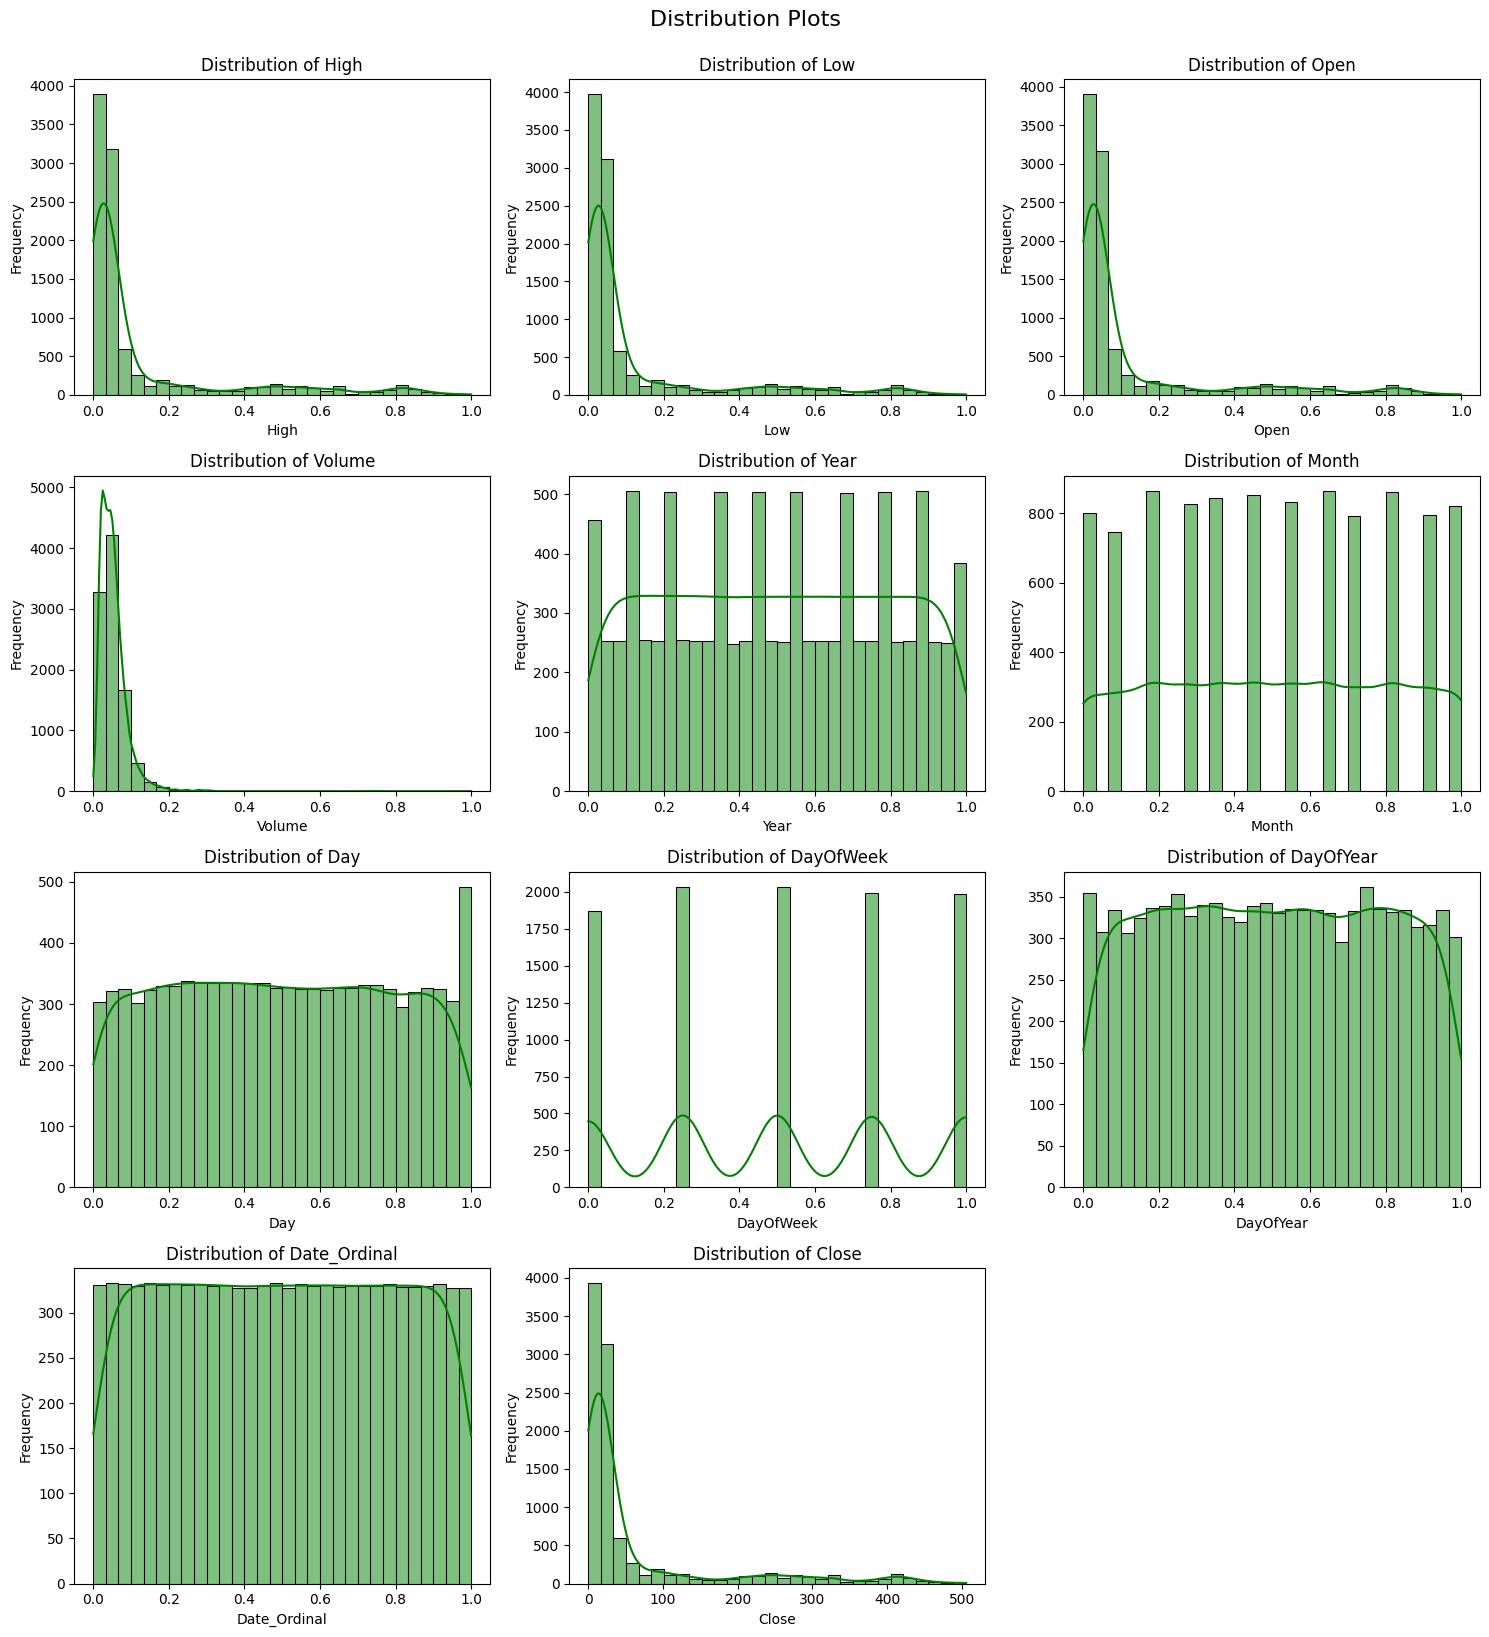

In [35]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=features_scaled_df[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Distribution Plots", y=1.02, fontsize=16)
plt.show()


 # Pairplot which the most related features with target

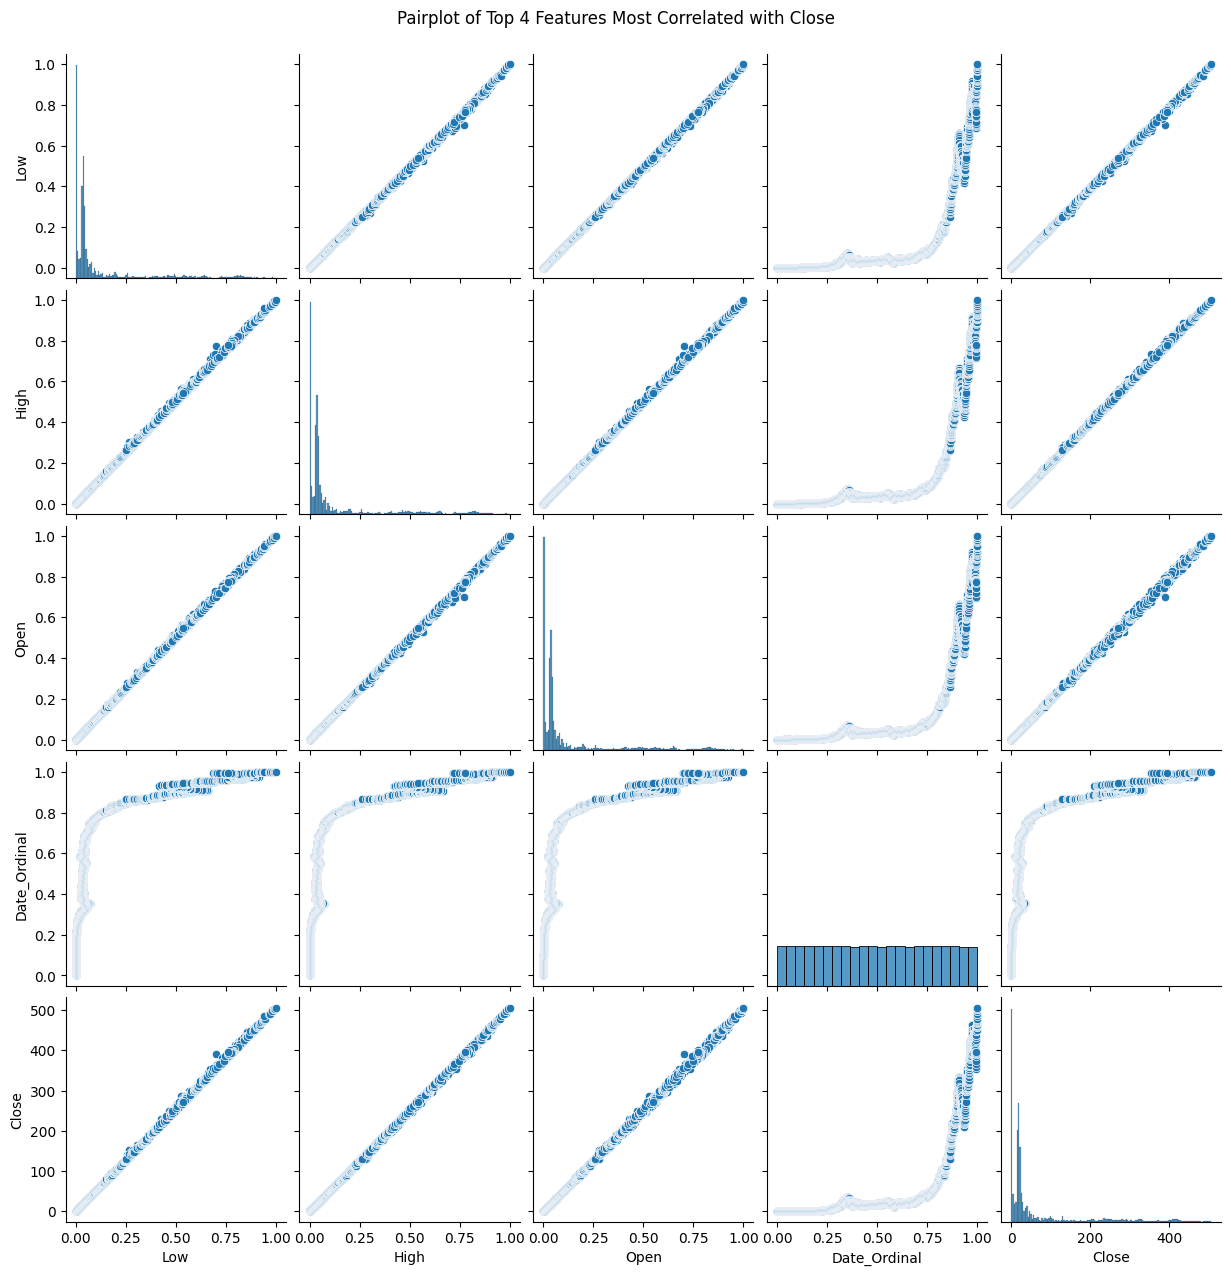

In [36]:
top_corr_features = features_scaled_df.corr()['Close'].drop('Close').abs().sort_values(ascending=False).head(4).index.tolist()

sns.pairplot(features_scaled_df[top_corr_features + ['Close']])
plt.suptitle("Pairplot of Top 4 Features Most Correlated with Close", y=1.02)
plt.show()


##****

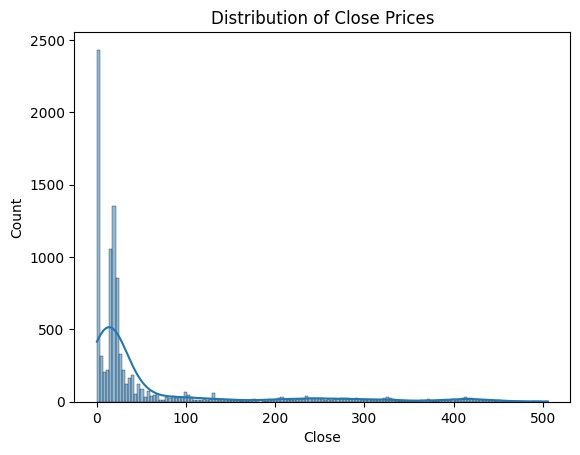

In [37]:
sns.histplot(features_scaled_df['Close'], kde=True)
plt.title("Distribution of Close Prices")
plt.show()


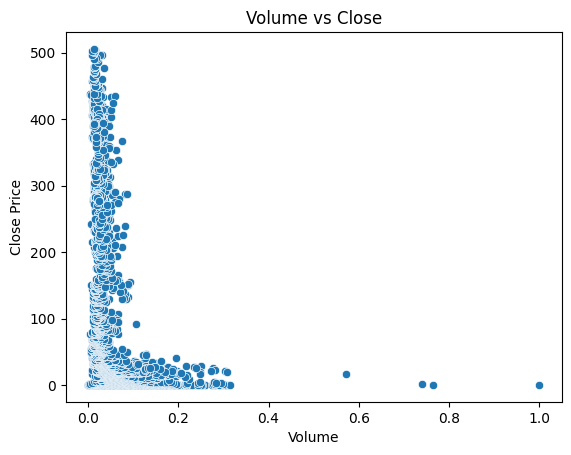

In [38]:
# Relationship between Volume vs Close Using scatterplot
New_Data['Close'] = data['Close']
# scatterplot plotting
sns.scatterplot(data=New_Data, x='Volume', y='Close')
plt.title("Volume vs Close")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

# **Build a Machine Learning Model**

In [47]:
data = pd.read_csv("final_preprocessed_data.csv")
X = data.drop(columns=['Close'])
y = data['Close']

##**Split the data**

In [81]:
# import processed
final_df = pd.read_csv("final_preprocessed_data.csv")
final_df = final_df.sort_values(by="Date_Ordinal")

# Split data 80 % train , 20 test
train_size = int(len(final_df) * 0.8)
train = final_df.iloc[:train_size]
test = final_df.iloc[train_size:]

X_train = train.drop(columns=["Close"])
y_train = train["Close"]

X_test = test.drop(columns=["Close"])
y_test = test["Close"]


##**Import Machine Learning Model**

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
y_pred = model.predict(X_test)

##**Training Performance (Validation)**

In [83]:
# Select the Last 10 samples in Data
n = 10
X_sample = X.tail(n)
y_true = y.tail(n)

# Prediction
y_pred = model.predict(X_sample)

# Results
results = pd.DataFrame({
    'Actual_Close': y_true.values,
    'Predicted_Close': y_pred
})
print(results)


   Actual_Close  Predicted_Close
0    492.049988       493.858387
1    491.089996       492.164491
2    498.839996       498.901766
3    497.720001       497.214717
4    496.619995       495.988209
5    503.510010       505.370764
6    501.480011       500.442271
7    503.320007       503.515867
8    503.019989       503.497194
9    505.820007       507.411474


##**The relationship between  Actual - Peredictive Train**

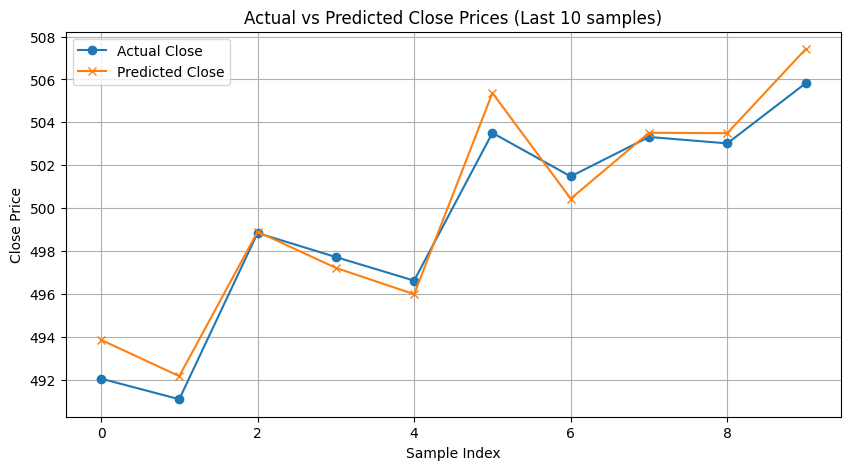

In [73]:
plt.figure(figsize=(10,5))
plt.plot(range(n), results['Actual_Close'], label='Actual Close', marker='o')
plt.plot(range(n), results['Predicted_Close'], label='Predicted Close', marker='x')
plt.title("Actual vs Predicted Close Prices (Last 10 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# Seclect the first five row
n_test = 6
X_test_sample = X_test.head(n_test)
y_test_sample = y_test.head(n_test)

# precdict using the traied model
y_test_pred_sample = model.predict(X_test_sample)
# show the results
test_results = pd.DataFrame({
    'Actual_Close': y_test_sample.values,
    'Predicted_Close': y_test_pred_sample
})
test_results


,Actual_Close,Predicted_Close
0,66.782372,66.870048
1,66.754814,66.445280
2,66.874191,67.029497
3,66.883377,66.786321
4,67.085403,66.895643
5,67.967041,67.816526


##**The relationship between  Actual - Peredictive Test**

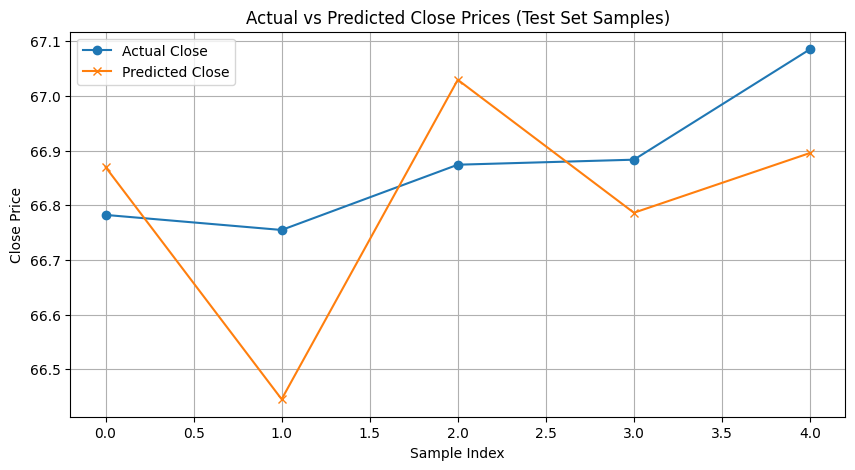

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(range(n_test), test_results['Actual_Close'], label='Actual Close', marker='o')
plt.plot(range(n_test), test_results['Predicted_Close'], label='Predicted Close', marker='x')
plt.title("Actual vs Predicted Close Prices (Test Set Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [85]:
data = pd.read_csv("final_preprocessed_data.csv")
future_dates = pd.date_range(start="2026-01-01", end="2026-12-31", freq='D')
future_df = pd.DataFrame()
future_df['Date'] = future_dates

# We extract the same temporal features we used in training.
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['DayOfYear'] = future_df['Date'].dt.dayofyear
future_df['Date_Ordinal'] = future_df['Date'].apply(lambda x: x.toordinal())

# Add missing columns with mean values from training data
for col in ['High', 'Low', 'Open', 'Volume']:
    if col in X_train.columns:
        future_df[col] = X_train[col].mean()


# We only specify the columns on which the model is trained.
future_features = future_df[X.columns]

# We use the model to predict the Close
future_df['Predicted_Close'] = model.predict(future_features)

# Seclect the first five feature
future_df[['Date', 'Predicted_Close']].head(4)

,Date,Predicted_Close
0,2026-01-01,9.655326e+07
1,2026-01-02,9.655339e+07
2,2026-01-03,9.655351e+07
3,2026-01-04,9.655364e+07


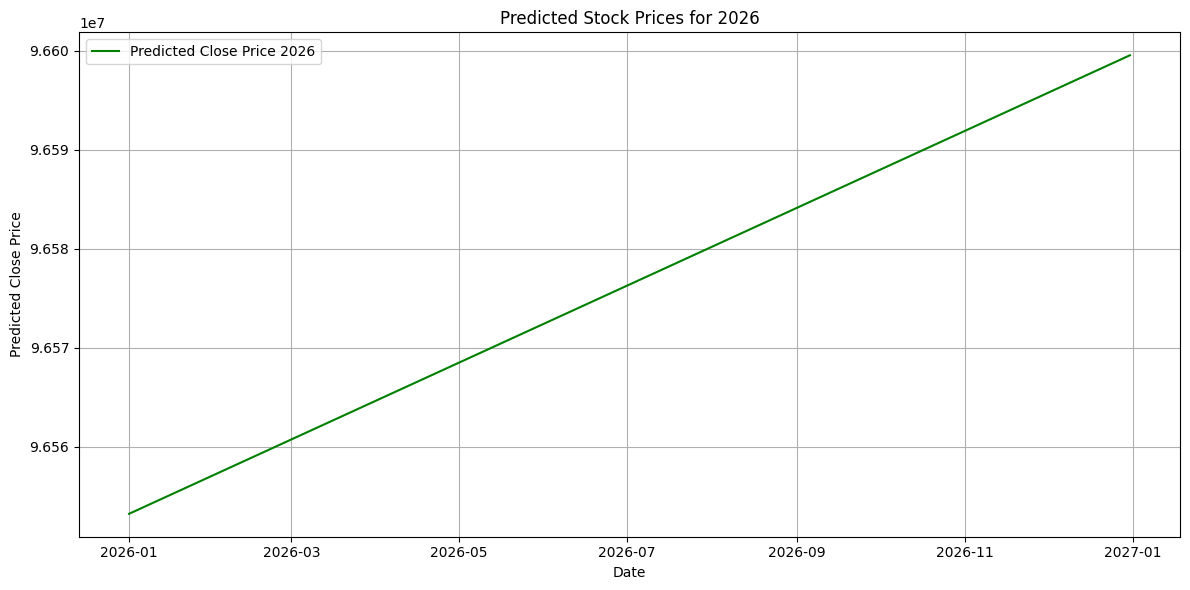

In [63]:
# draw the expected price for the year 2026
plt.figure(figsize=(12,6))
plt.plot(future_df['Date'], future_df['Predicted_Close'], label='Predicted Close Price 2026', color='green')
plt.title("Predicted Stock Prices for 2026")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
y_pred_test = model.predict(X_test)


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Performance evaluation
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)


# Show the results
print("Model Evaluation on Test Data:")
print(f"Mean Absolute Error MAE: {mae:.2f}")
print(f"Mean Squared Error MSE: {mse:.2f}")
print(f"Root Mean Squared Error RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation on Test Data:
Mean Absolute Error MAE: 1.04
Mean Squared Error MSE: 2.29
Root Mean Squared Error RMSE: 1.51
R² Score: 0.9998
